# imports

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [4]:
url = 'https://drive.google.com/uc?export=download&id=11sg65mzoOB15VFEly6dqe3SLZv14AgSA'
df = pd.read_csv(url)
df.head(2)

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662


# Simple Line

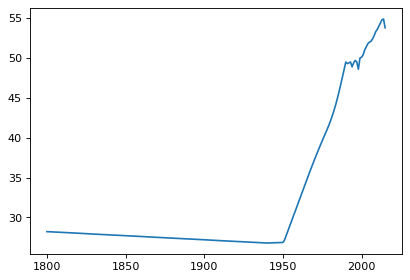

In [3]:
x = df[df.country == 'Afghanistan'].year
y = df[df.country == 'Afghanistan'].life_expectancy

plt.figure(figsize=(6, 4), dpi=80)

plt.plot(x, y)
plt.show()

# Available fonts

In [ ]:
import matplotlib.font_manager
fpaths = matplotlib.font_manager.findSystemFonts()

for i in fpaths:
    f = matplotlib.font_manager.get_font(i)
    print(f.family_name)

FreeSans
Droid Sans Fallback
DejaVu Sans Mono
Source Code Pro
Arimo
Ubuntu Condensed
Inconsolata
Tinos
IPAexGothic
DejaVu Serif
C059
Tinos
Cousine
Tinos
Cousine
Ubuntu
IPAPGothic
Source Code Pro
Ubuntu
FreeMono
Ubuntu
Nimbus Mono PS
URW Bookman
Source Code Pro
Nimbus Roman
Ubuntu Mono
AR PL UMing CN
Ubuntu
Cousine
URW Gothic
Source Code Pro
Caladea
Carlito
Nimbus Mono PS
P052
Nimbus Roman
DejaVu Serif
Carlito
Source Code Pro
Source Code Pro
Caladea
FreeMono
Ubuntu
Ubuntu
FreeSerif
FreeSans
Ubuntu
IPAGothic
FreeMono
DejaVu Sans Mono
FreeMono
Source Code Pro
FreeMono
Ubuntu Mono
Standard Symbols PS
Nimbus Sans Narrow
URW Bookman
Z003
Cousine
Arimo
Ubuntu
FreeSerif
IPAPMincho
Caladea
Nimbus Sans
Arimo
FreeSans
Ubuntu
Ubuntu
IPAexMincho
DejaVu Sans
FreeSans
Source Code Pro
Ubuntu
Ubuntu
Nimbus Sans Narrow
FreeSans
Inconsolata
FreeSerif
Ubuntu Mono
Source Code Pro
Source Code Pro
IPAexGothic
URW Gothic
Ubuntu
URW Bookman
DejaVu Sans
Ubuntu
FreeSerif
D050000L
FreeMono
Arimo
FreeMono
DejaVu S

# rcParams
- matplotlib.rcParams contains some properties in matplotlibrc file. 
- We can use it to control the defaults of almost every property in Matplotlib: figure size and DPI, line width, color and style, axes, axis and grid properties, text and font properties and so on.
- The matplotlib.rcParams object can also be changed temporarily using the **matplotlib.rc_context** context manager

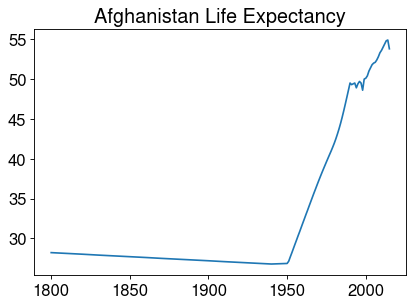

In [20]:
plt.rcParams['figure.figsize'] = (10, 8)  # set figure size
plt.rcParams['image.interpolation'] = 'nearest'  # set interpolation
plt.rcParams['font.sans-serif'] = 'Nimbus Sans'  # set font
plt.rcParams['font.size'] = 15  # set font size


x = df[df.country == 'Afghanistan'].year
y = df[df.country == 'Afghanistan'].life_expectancy

plt.figure(figsize=(6, 4), dpi=80)
plt.title('Afghanistan Life Expectancy')
plt.plot(x, y)
plt.show()

## Back to defaults and context
- the changes in rdParams above where permanent - go to defaults with `plt.rcdefaults()`
- use `matplotlib.rc_context` to only change the context

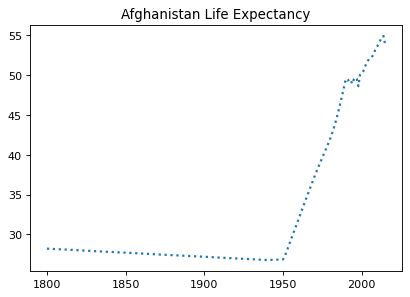

In [18]:
x = df[df.country == 'Afghanistan'].year
y = df[df.country == 'Afghanistan'].life_expectancy

plt.rcdefaults() # back to defaults

with plt.rc_context({'lines.linewidth': 2, 'lines.linestyle': ':'}): # contextual params
    plt.figure(figsize=(6, 4), dpi=80)
    plt.title('Afghanistan Life Expectancy')
    plt.plot(x, y)
    plt.show()

# Styles

In [21]:
print(plt.style.available)  # show available styles

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


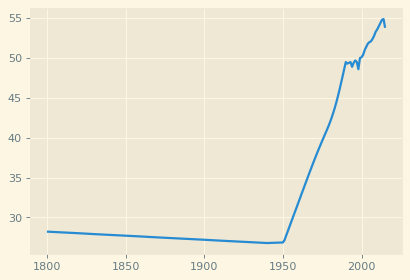

In [4]:
x = df[df.country == 'Afghanistan'].year
y = df[df.country == 'Afghanistan'].life_expectancy

plt.figure(figsize=(6, 4), dpi=80)

plt.plot(x, y)
plt.style.use('seaborn-v0_8-deep')
plt.show()

# Subplots

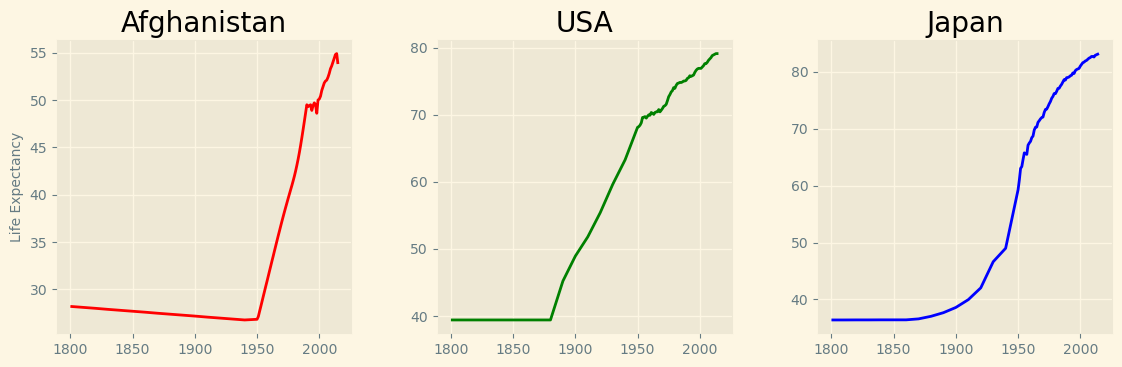

In [7]:
from matplotlib.ticker import FuncFormatter

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax1, ax2, ax3 = axes

x_af = df[df.country == 'Japan'].year
y_af = df[df.country == 'Afghanistan'].life_expectancy

x_us = df[df.country == 'United States'].year
y_us = df[df.country == 'United States'].life_expectancy

x_jap = df[df.country == 'Japan'].year
y_jap = df[df.country == 'Japan'].life_expectancy

plt.style.use('fivethirtyeight')

ax1.set_ylabel('Life Expectancy', fontsize=10)
fig.tight_layout(pad=2)

ax1.plot(x_af, y_af, c='r', linewidth=2)
ax1.set_title('Afghanistan')

ax2.plot(x_us, y_us, c='g', linewidth=2)
ax2.set_title('USA')

ax3.plot(x_jap, y_jap, c='b', linewidth=2)

ax3.set_title('Japan')

# Apply a lambda function to format the secon y-axis with zero decimals
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x)}'))

plt.show()

# Multiple Lines In One Chart

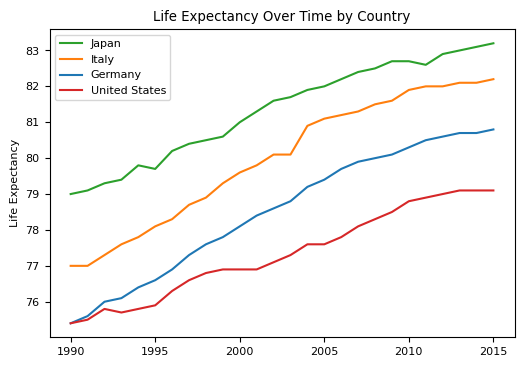

In [49]:
# Create a figure
plt.rcParams['font.size'] = 8  # set font size
plt.figure(figsize=(6, 4))

df_developed = df[~df.country.isin(['Afghanistan', 'Russia'])]

for country in df_developed['country'].unique():
    subset = df_developed[df_developed['country'] == country]
    plt.plot(subset['year'], subset['life_expectancy'], label=country)

# Add labels and title
plt.title('Life Expectancy Over Time by Country', fontsize='large')
plt.ylabel('Life Expectancy')
plt.legend(title='Country')

# Reorder the legends labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 1, 0, 3]  # Define the desired order of the legend items
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

plt.show()

# Secondary Axis

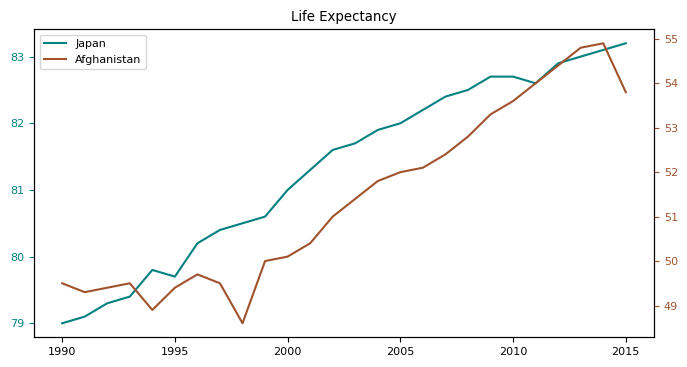

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(8, 4))

# Example data
jap = df[df.country == 'Japan']
afg = df[df.country == 'Afghanistan']

# Create a secondary y-axis for Afghanistan
ax2 = ax1.twinx()

# Plot data on each axis with labels for the legend
ax1.plot(jap.year, jap.life_expectancy, color='teal', label='Japan')
ax2.plot(afg.year, afg.life_expectancy, color='sienna', label='Afghanistan')

# Change the color of the y-axis ticks for each axis
ax1.tick_params(axis='y', colors='teal')
ax2.tick_params(axis='y', colors='sienna')

# Collect handles and labels from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine legends and display
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc='upper left')

# Set title and show the plot
plt.title('Life Expectancy')
plt.show()

# Uncomparable axes
-  the second plot  more accurately shows that most of the variation occurs on test 2.

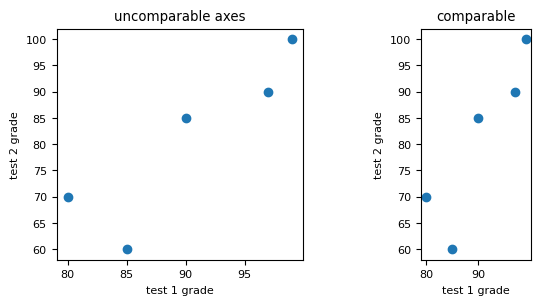

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))

test_1_grades = [99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

ax[0].scatter(test_1_grades, test_2_grades)
ax[0].set_title("uncomparable axes")
ax[0].set_xlabel("test 1 grade")
ax[0].set_ylabel("test 2 grade")

ax[1].scatter(test_1_grades, test_2_grades)
ax[1].set_title("comparable")
# this is the defining line - it sets both axis in the same scale
ax[1].set_aspect('equal')
ax[1].set_xlabel("test 1 grade")
ax[1].set_ylabel("test 2 grade")

plt.show()

# Scatterplot + trendline
- visualizing the relationship between two paired sets of data
- trendline with numpy ployfit() & poly1d()

In [22]:
df.year.max()

np.int64(2015)

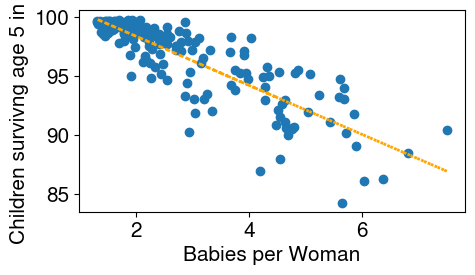

In [24]:
plt.figure(figsize=(5, 3))
x = df[df.year == 2015]['babies_per_woman']
y = df[df.year == 2015]['age5_surviving']

# add a trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="orange", linewidth=2, linestyle='dotted')

plt.scatter(x, y)
plt.xlabel('Babies per Woman')
plt.ylabel('Children survivng age 5 in %')
plt.tight_layout()
plt.show()

# Bar Plot
- show how some quantity varies among some discrete set of items

In [25]:
life_expectancy_dict = {}
for country in df.country.unique():
    # function to fetch the mean life expactancy of all countries in the df after 2000
    life_expectancy = df[(df.country == country) & (
        df.year > 2000)].life_expectancy.mean().round(1)
    life_expectancy_dict[country] = life_expectancy

In [26]:
from operator import itemgetter

lowest = dict(
    sorted(life_expectancy_dict.items(),
           key=itemgetter(1))[:1])  # get lowest in a dict ordered by values
highest = dict(
    sorted(life_expectancy_dict.items(), reverse=True, key=itemgetter(1))[:1])

In [27]:
lowest_and_highest = {
    **lowest,
    **highest
}  # join two dictionaries by unpacking them in a new dictionary
lowest_and_highest['Germany'] = life_expectancy_dict['Germany']
lowest_and_highest['USA'] = life_expectancy_dict['United States']
lowest_and_highest['Russia'] = life_expectancy_dict['Russia']

sorted_lowest_highest = dict(
    sorted(lowest_and_highest.items(),
           key=lambda item: item[1]))  # another way to sort a dictionary
sorted_lowest_highest

{'Lesotho': np.float64(45.5),
 'Russia': np.float64(67.9),
 'USA': np.float64(78.2),
 'Germany': np.float64(79.8),
 'Japan': np.float64(82.4)}

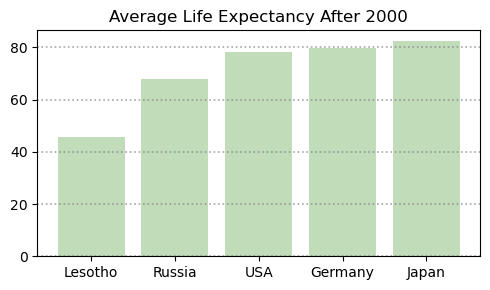

In [28]:
import matplotlib.pyplot as plt

plt.matplotlib.rc_file_defaults()  # reset defaults
plt.figure(figsize=(5, 3))
plt.bar(x=sorted_lowest_highest.keys(),
        height=sorted_lowest_highest.values(),
        color='xkcd:fern',
        alpha=0.4)
plt.grid(color='grey', linestyle=':', linewidth=1.2, axis='y', alpha=0.7)
plt.title('Average Life Expectancy After 2000')
plt.tight_layout()
plt.show()

# Grouped Bar Chart

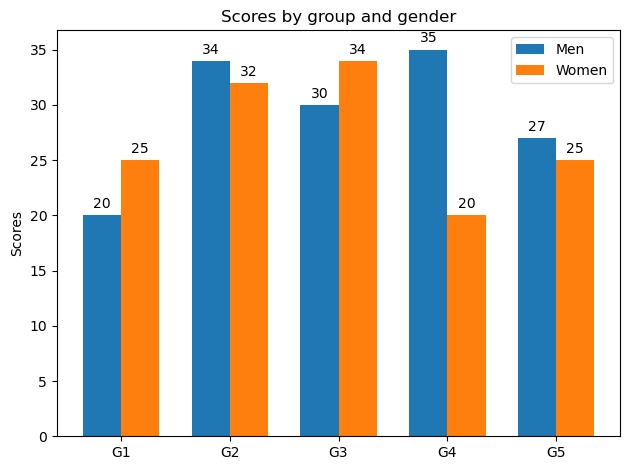

In [159]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, men_means, width, label='Men')
rects2 = ax.bar(x + width / 2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

# BarH - horizontal barplot

In [ ]:
sorted_lowest_highest.keys()

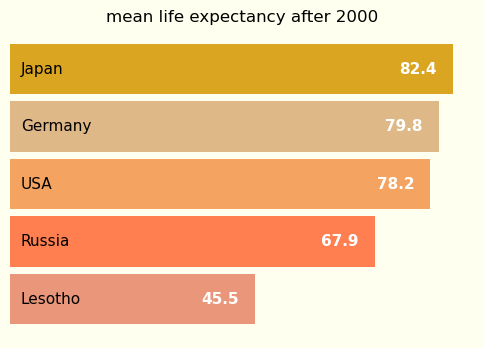

In [161]:
colors = {
    'Lesotho': 'darksalmon',
    'Russia': 'coral',
    'USA': 'sandybrown',
    'Germany': 'burlywood',
    'Japan': 'goldenrod'
}

fig, ax = plt.subplots(figsize=(6, 4), facecolor="ivory")  # figure color

ax.set_facecolor('ivory')  # axis color
ax.spines[:].set_visible(False)  # remove spines
ax.set_title('mean life expectancy after 2000', size=12)

ax.tick_params(labelbottom=False,
               bottom=False,
               labelleft=False,
               left=False,
               pad=10)  # manipulate ticks and labels

for k, v in sorted_lowest_highest.items():
    ax.barh(k, v, color=colors[k], height=0.87)

    ax.text(
        2,  # X location of text (with adjustment)
        k,  # Y location
        s=f'{k}',  # Required label with formatting
        va='center',  # Vertical alignment
        ha='left',  # Horizontal alignment
        color='k',  # Font colour and size
        size=11)

    ax.text(v - 3,
            k,
            s=f'{round(v ,1)}',
            va='center',
            ha='right',
            color='white',
            size=11,
            fontweight='bold')


## ax.bar_label
in-built function that puts the label in or next to the bars

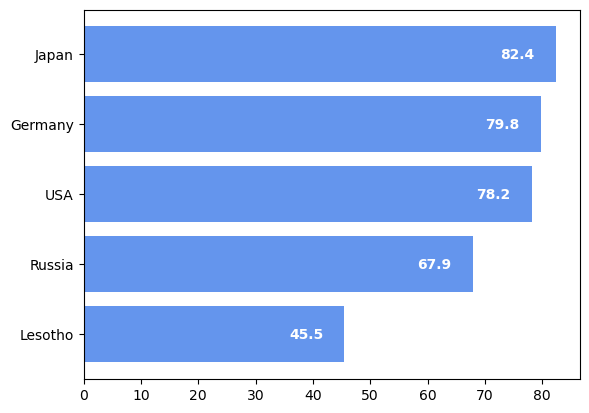

In [162]:
fig, ax = plt.subplots()

country = list(sorted_lowest_highest.keys())
life = list(sorted_lowest_highest.values())

bars = ax.barh(country, life, color='cornflowerblue')

ax.bar_label(bars, padding=-40, color='w', size=10, fontweight='bold')
plt.show()

## Where to start your y_axis
- if the y-axis does not on 0, amke that pretty clear 
- anything else would be misleading
- of course starting at 0 when all value are in the millions doesn't help

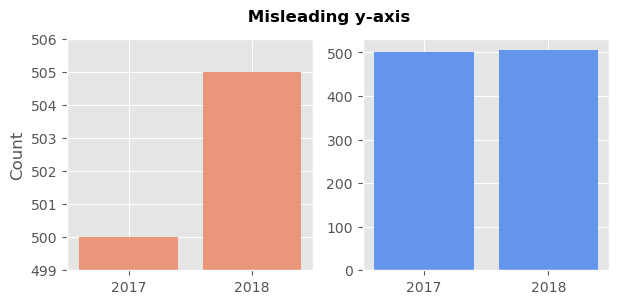

In [163]:
mentions = [500, 505]
years = [2017, 2018]
plt.style.use('ggplot')  # pick a style

fig, ax = plt.subplots(1, 2, figsize=(7, 3))

fig.suptitle(' Misleading y-axis ', fontweight='bold', fontsize=12)

ax[0].bar(years, mentions, color='darksalmon')
ax[0].axis([2016.5, 2018.5, 499, 506]) # change the range of the x-axis and y-axis
ax[0].set_xticks(years)
ax[0].set_ylabel('Count')

ax[1].bar(years, mentions, color='cornflowerblue')
ax[1].set_xticks(years)
plt.show()

# Histogram
-  To construct a histogram, the first step is to "**bin**" (or "bucket") the range of values—that is, divide the <br>
entire range of values into a series of intervals—and then count how many values fall into each interval. 
- If the bins are of equal size, a rectangle is erected over the bin with height proportional to the frequency.
- A histogram may also be **normalized** to display "relative" frequencies.
- different ways to pick colors are implemented - see color

In [5]:
life_spans = df[df.year == 2015]['life_expectancy']
life_spans.min(), life_spans.max()

(np.float64(47.1), np.float64(83.3))

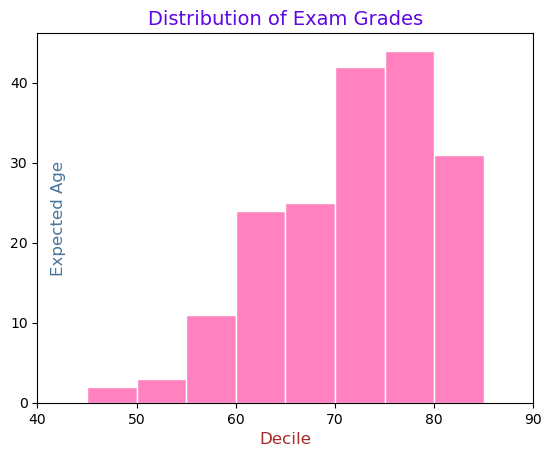

In [7]:
bin_edges = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85]

plt.hist(x=life_spans,
    bins=bin_edges,
    range=[47, 83],
    facecolor='xkcd:pink',
    edgecolor='w',
    align='mid',
    color='teal'
    )

# color are choosen just because !!! check the possibilities below
plt.xlim(40, 90)
plt.xlabel("Decile", fontsize=12, color='brown')
plt.ylabel("Expected Age",
    fontsize=12,
    labelpad=-40,
    color='xkcd:dull blue')
plt.title("Distribution of Exam Grades", fontsize=14, color='xkcd:blue violet')

plt.show();

## Bar Bins
- custom histogram -- barplot with selfmade bins

In [36]:
from collections import Counter

plt.matplotlib.rc_file_defaults()  # reset defaults

histogram = Counter(
    min(age // 10 * 10, 90) for age in list(life_spans))  # Bucket grades by decile, but put 100 in with the 90s
print(histogram)

Counter({70.0: 86, 60.0: 49, 80.0: 31, 50.0: 14, 40.0: 2})


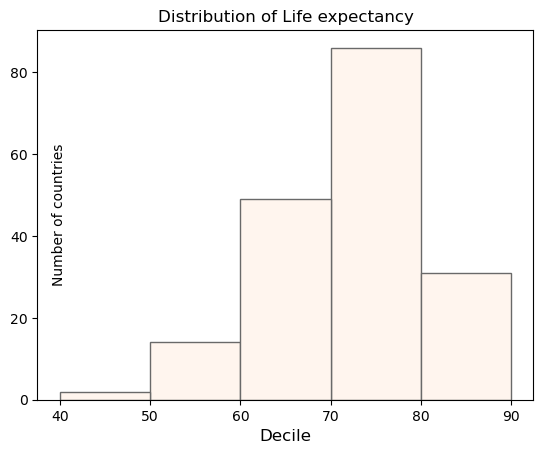

In [45]:
plt.bar(
    x=[x + 5 for x in histogram.keys()],  # Shift bars to the right by 5
    height=histogram.values(),  # Give each bar its correct height
    width=10,  # Give each bar a width of 10
    color='seashell',
    edgecolor='dimgray')  # colored edges for each bar

plt.xlabel("Decile", fontsize=12)
plt.ylabel("Number of countries", fontsize=10, labelpad=-40)
plt.title("Distribution of Life expectancy", fontsize=12, y=1)
plt.show()


## Bins
Bin edges can be defined or the number of bins is defined

You may derive the bins using the following formulas:
- n = number of observations
- Range = maximum value – minimum value
- no. of bins =  √n
- Width of bins =  range / bins

In [49]:
age = list(life_spans)

xmin = min(age)
xmax = max(age)
range = max(age) - min(age)
bins = len(age)**0.5
bin_width = range / bins
print('min: ' + str(xmin))
print('max: ' + str(xmax))
print('range: ' + str(round(range, 2)))
print('bins: ' + str(round(bins, 2)))
print('bin width: ' + str(round(bin_width, 2)))

min: 47.1
max: 83.3
range: 36.2
bins: 13.49
bin width: 2.68


There is also binning strategies supported by numpy.histogram_bin_edges: <br>
set `bins` to one of: 'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', or 'sqrt'. <br>
https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy-histogram-bin-edges

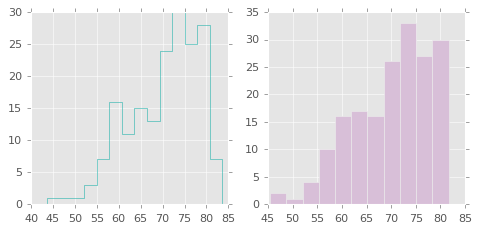

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))

ax[0].hist(x=life_spans,
    bins=14,
    range=[45, 85],
    align='left',
    color='lightseagreen',
    histtype='step')


ax[1].hist(x=life_spans,
    bins='doane',
    align='left',
    color='thistle',
    histtype='bar',
    rwidth=20)

plt.style.use('ggplot')
plt.show()

# Pie Chart
- Pie charts encode continuous variables primarily using the angles made in the center of the circle. 
- The Pie 100% is always divided and thus showing relative values
- Angles are harder to read than aligned bars. 
- Pie charts can be a complement to stacked bar charts (bothe holding the same info),  they involve comparison and composition
- Some suggest abandoning pie charts if there are any more than three parts to the whole, as they become very hard to read when there are many segments. ProPublica’s graphics style guide (https://github.com/propublica/guides/blob/master/news-apps.md) goes further, allowing pie charts with
two segments only.

In [79]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


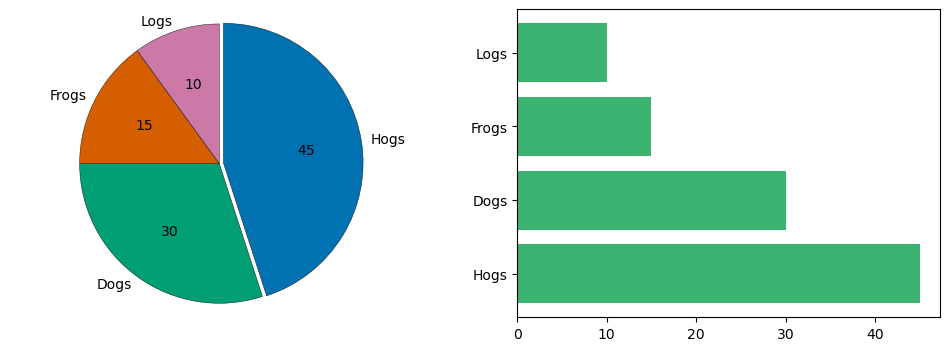

In [82]:
import matplotlib.pyplot as plt

plt.matplotlib.rc_file_defaults()  # reset defaults
plt.style.use('seaborn-v0_8-colorblind')  # pick a style

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Hogs', 'Dogs', 'Frogs', 'Logs'
sizes = [45, 30, 15, 10]
explode = (0.03, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%.0f',  # if you had percent the % is shown by writing '%.0f%%'
    counterclock=False,
    startangle=90,
    labeldistance=1.07,
    wedgeprops={
        "edgecolor": "k",
        'linewidth': 0.3,
        'antialiased': True
    })

ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].barh(labels, sizes, color='mediumseagreen')

plt.show()

# frame & axis

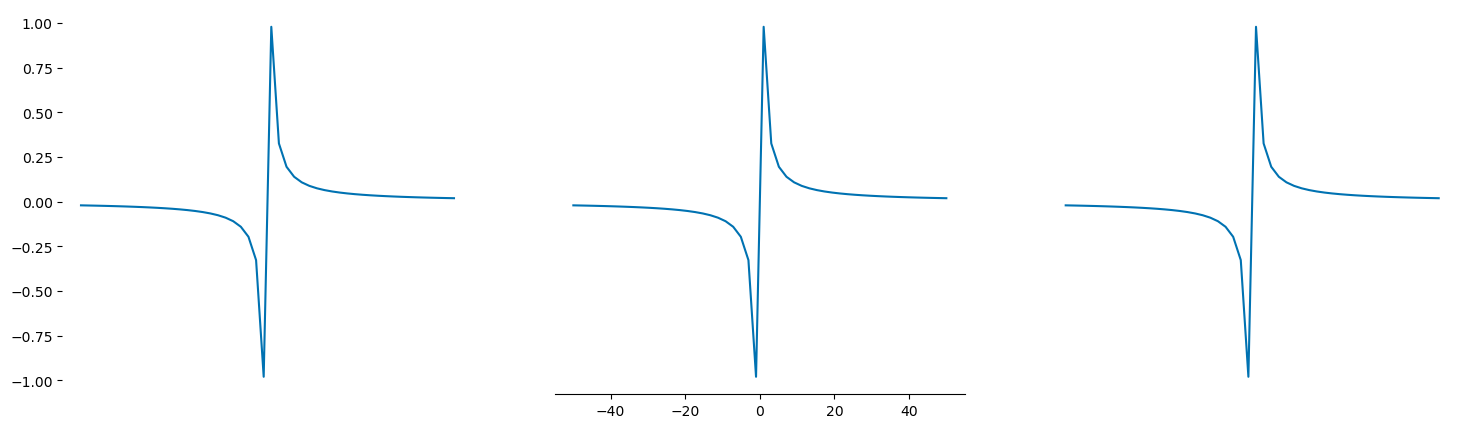

In [95]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

x = np.linspace(-50, 50)
y = x**-1

ax[0].plot(x, y)
ax[0].get_xaxis().set_visible(False)  #hide x-axis
ax[0].set_frame_on(False)  # hide frame 

ax[1].plot(x, y)
ax[1].get_yaxis().set_visible(False)  # hide y-axis
ax[1].spines[["left", "top", "right"]].set_visible(False)  # hide spines


ax[2].plot(x, y)
ax[2].set_axis_off()  # hide all axis

# colors
- https://matplotlib.org/stable/tutorials/colors/colors.html
- "CN" color spec where 'C' precedes a number acting as an index into the default property cycle.

### Helper Function for colors

In [96]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted(
            (tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))), name)
            for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin / width, margin / height,
                        (width - margin) / width, (height - margin) / height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows - 0.5), -cell_height / 2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x,
                y,
                name,
                fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y - 9),
                      width=swatch_width,
                      height=18,
                      facecolor=colors[name],
                      edgecolor='0.7'))

    return fig

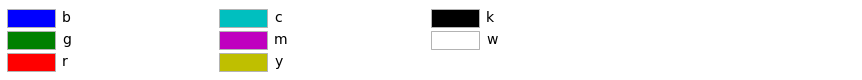

In [98]:
plot_colortable(mcolors.BASE_COLORS, sort_colors=False, emptycols=1)
plt.show()

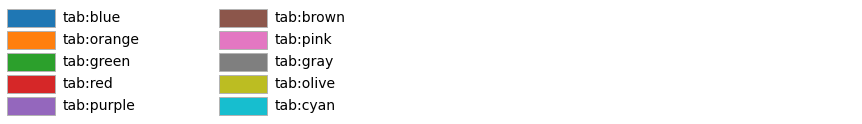

In [99]:
plot_colortable(mcolors.TABLEAU_COLORS, sort_colors=False, emptycols=2)
plt.show()

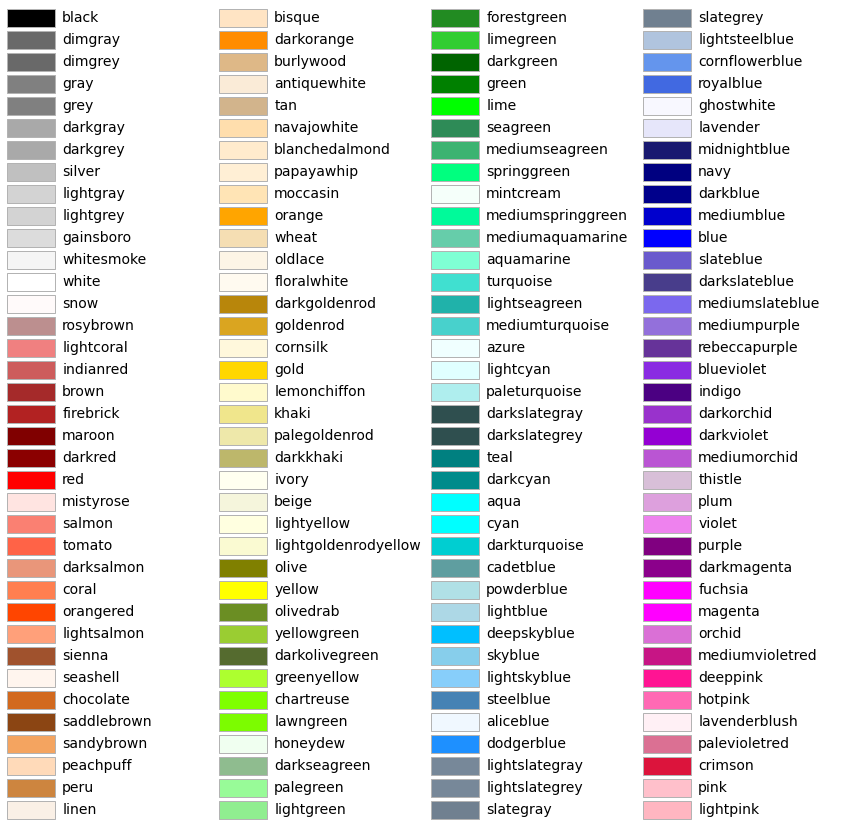

In [100]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

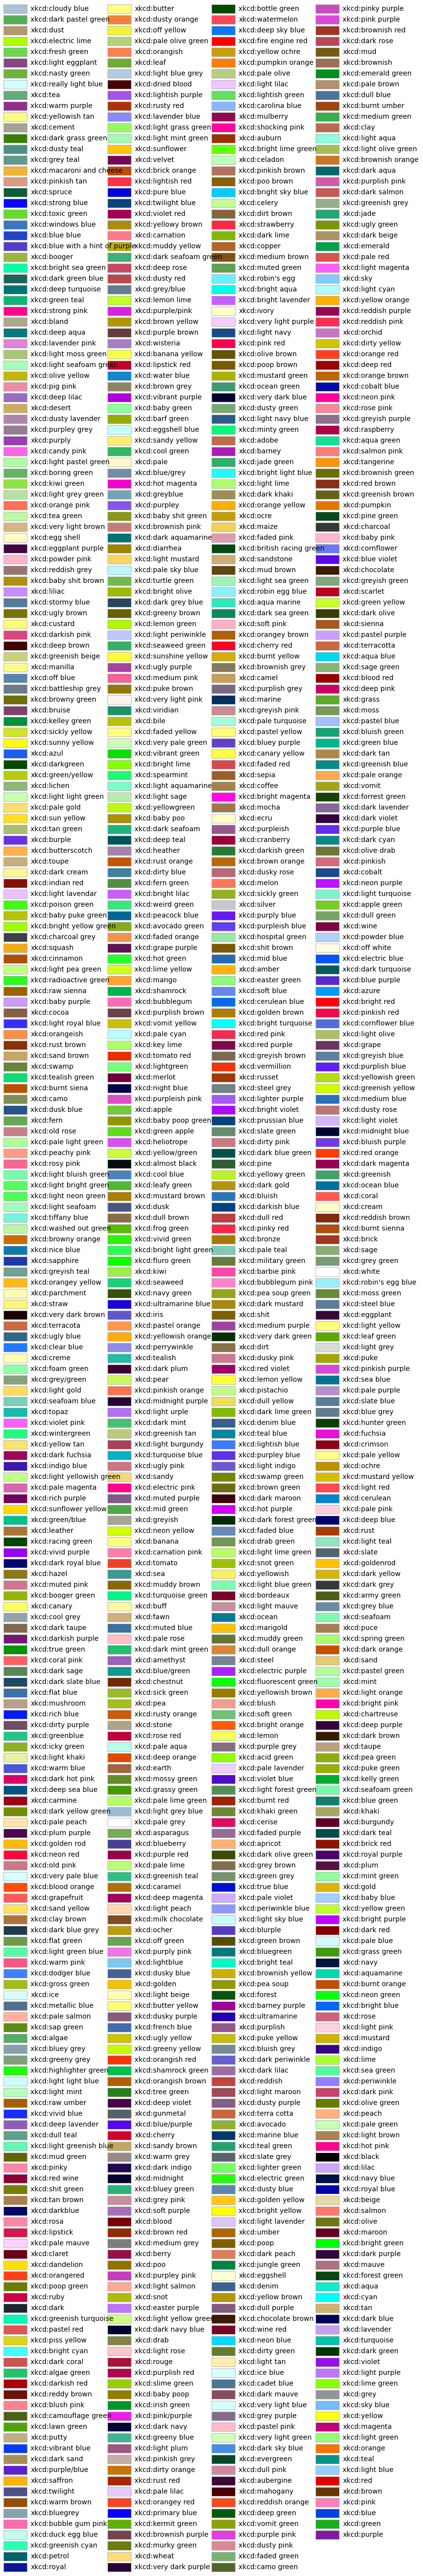

In [101]:
xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
xkcd_fig.savefig("XKCD_Colors.png")  # https://xkcd.com/color/rgb/